# 서울메트로 "고객의 소리" 게시글 스크래핑
서울교통공사 홈페이지에 올라온 고객의 소리 전체 게시글을 스크래핑해서 어떤 키워드들이 많이 등장했는지 알아보려고 한다.<br>
현재 게시글은 (작성일기준)2021년 11월 29일부터 12월 05일까지 총 389건이다.


In [1]:
import requests
from bs4 import BeautifulSoup
import urllib3
import time
import re

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [28]:
pre_url = "https://www.seoulmetro.co.kr:444/kr/board.do?menuIdx=857&bbsIdx="

title = []
content = []
error_num = []

# 가장 오래된 글-2212849, 가장 최신 글-2213260
for num in range(2212849,2213261):
    url = pre_url+str(num)
    response = requests.get(url, verify=False).content
    soup = BeautifulSoup(response,'html.parser')
    
    try:
        # 글 제목
        subject = soup.find('td').get_text().replace("\n","").replace("\t","").strip()
        # 글 본문
        main = soup.find('div',{'class':'textarea-area'})
        sentence = ""
        for item in main.find_all('p'):
            sentence += item.get_text().replace("\n","").replace("\t","").replace("\xa0","").strip()
        
        title.append(subject)
        content.append(sentence)
        print("====================")
        print(subject,":",sentence )
        
    except:
        error_num.append(num)
        print("****error_num****")
        print(num)
        pass
    
    time.sleep(2)

2022년에는 열차 지연이 없게 해주세요 : 2022년에는 1~8호선 모든 열차가 정시 출도착할 수 있게해 주세요! 서울교통공사 홧팅~
****error_num****
2212850
****error_num****
2212851
2022년엔 항상 안전운행하고 열차 사고 및 지연이 없기를 바랍니다. : 제목 그대로 입니다!2022년에는 항상 안전운행을 유지될 수 있도록 진심으로 바랍니다. 또한 관계자분들과 승객분들이 서로 불편한점 없이 열차 사고 및 지연이 제로가 될 수 있기를 진심으로 바랍니다.감사합니다.다가오는 2021년 연말.미리 인사 드립니다. 한 해동안 수고 많았습니다.
2022년 화이팅 : 2022년에도 안전운행 부탁드립니다올한해도 고생많으셨습니다
지하철 이용하는 사람들 모두 행복한 일만 가득했으면 좋겠어요 : 새해는 지하철 이용하는 사람들 모두 행복한 일만 가득했으면 좋겠어요홧팅
****error_num****
2212855
안전최고! 행복최고! : 2022년에는 안전한 운행으로 행복한 2022년을 만들어 갑시다!
2022 화이팅! : 2022년에는 승객들이 더욱 안전하고 질서있게 이용하는 지하철이 됐으면 좋겠어요잡상인, 임산부, 노약자석에 대한 관리가 더욱 강화되었으면 합니다 !2022년도 화이팅 !!
☆올해도 수고많으셨고, 내년에도 서울교통공사 또타화이팅☆ : 올해는 코로나19로 인해 지하철 이용하기가 불편하고 걱정스러운면이 있었습니다.그러나 걱정은 잠시뿐 항상 마스크착용 안내방송이 흘러나오고, 소독도 열심히 해주시는 모습을 보며안심하고 지하철을 이용하게 되었습니다.2022년에도 깨끗하고 안전한열차 타게해주세요~서울교통공사 직원 여러분들 시민을 위해 노력해주셔서 감사합니다*^^*
자랑스런 서울지하철 : 세계최고 서울지하철~ 너무 자랑스럽습니다~
올한해도 수고많으셨습니다 : <form name="actionForm" id="actionForm" method="post" action="https://www.seoulmetro.co.kr:444/kr/

역소개할때 어떨 때는 너무 크게 들려요 : 다음 역 소개할때 어떨 때는 소리가 너무 크게 들려요아무리 이어폰 끼고 있는 사람이 많다고는 하지만지하철 내 역 소개 방송이 나올때 볼륨을 적절하게 해주시길 바랍니다!!감사합니다.
감사합니다 : 추운데 많으시죠? 감사합니다 안전운행부탁드려요~
이용중 불편사항입니다. : 365일 쉬지않고 열심히 시민의 발걸음이 되어주셔서 감사합니다.하지만 이용중에 불편했던 개선했으면하는점에 글남깁니다.바로 해당 열차 하차문입니다.친구나 지인을 지하철타던도중 만나기위해서 역에서만나기도하지만 동선이 겹칠경우 타던 열차에서 만나기도합니다.하지만 내가 어디에서 몇번째에탔는지는 열차에 나오지않아 혼란을 겪기도 하는데요 물론 상하행의 교대로 기차내에 기입하기는 어렵지만 만약 열차내 모니터에서 현시가 되면 어떠할까요?운전기관실방향에따라 몇번째 열차인지 현시되면 편리할것이라 생각됩니다.이러한 불편이 개선되면 좋겠고 앞으로도 발전해나가길 바랍니다.
고생하십니다.서울교통공사 직원분들! : 서울 지하철 이용하면서 역무원분들의 고생이 많으십니다. 쾌적한 환경 그리고 친절하고 지하철 이용하는 시민들을 위해 노력하시는 모습 칭찬합니다!22년에는 아무탈 없이 좋은 일만 가득하자구요!
고속터미널역 너무 복잡해요 : 3호선과 3번출구 같이 모든 표지판이 아라비아숫자로 되어 있어 초행인 사람은 정말 햇갈려요시각적으로 쉽게 구분되면 좋겠어요
CCTV강화 해주세요 : 승객들의 안전 그리고 범죄예방으로부터CCTV를 강화시켜 예방 효과를 높였으면 좋겠습니다.그리고 워낙 복잡한 출퇴근 시간대에범죄에 노출되기 쉬운데 집중 강화단속 해주시면 안전하게 열차를 탈 것 같아요
응원할게요 : 앞으로도 늘 응원하겠습니다
서울교통공사의 더 나은 내일을 응원합니다!!! : 2022년에도 서울 지하철을 이용하는 많은 시민들의 힘이 되어주기를 진심으로 바래봅니다!!!
올 한해도 감사합니다. : 도시철도에서 제일 중요한 건 안전이라고 생각합니다. 안전하게 믿을 수 있는서울교통공사 덕분에 올 한해도

지하철 보완관 순찰을 더욱 활성화해주세요. : 저도 지하철 타면서 진상고객 때문에 역무원을 호출한적도 있었어요.지하철은 특성상 문이 열리면 바로 내려버려서 사후조치를 취하기가 쉽지 않은것 같습니다.그래서 지하철 내 순찰을 더 자주했으면 좋겠어요.서울 지하철시스템은 세계최고 수준으로 알고 있습니다.서울의 거의 모든 시민들이 지하철을 이용하는 만큼 범죄장소가 되지 않도록 철저히 예방해야하며,또 진상고객들이 없도록 사전에 철저한 예방을 해야한다고 생각합니다.
경의중앙선 늘려주세요 : 경의중앙선 배차간격이 너무 커서 힘듭니다.
약냉방칸 표시 : 열차의 칸과 칸을 이동할때 칸막이 문에 '이번 칸은 약냉방칸입니다' 라는 문구가 있으면 좋겠어요약냉방칸을 이용할때 더욱 편하게 이용할 수 있을 것 같아요또 칸막이가 없는 신차에는 약냉방칸 안내를 더 잘 보이는곳에 붙여주세요약냉방칸이 어디인제 해메는 경우도 종종 있어요....
냉난방 : 여름엔 냉방겨울엔 난방을 잘 해주세요
지하철 보안관 순찰 횟수 증대 : 안녕하세요. 항상 안전한 지하철 운행을 위해 애써주셔서 감사하다는 말씀 먼저 전하고 싶습니다.제가건의하고 싶은 것은 지하철 내 보안 순찰 횟수 증가입니다. 마스크 미착용자로 인해열차 내에서 싸움이 발생했으나 역에 도착해서야 미착용자를 제재했던 경험이 있습니다. 물론 인력 부족으로 모든 열차 순찰이 힘들기는 하겠지만 지금보다 순찰 횟수를 증대해주시면 좋겠습니다.
주취자에 대한 빠른 대응 : 객내에서 주취상태의 사람들 종종 보곤 하는데자칫 폭력 상황으로 이어질 수 있는 경우가 많이 발생하곤 합니다주취자의 승차거부 및 강제하차가 빨리 이루어져야 합니다
역내 cctv : cctv가 부족한 역내ccyv증설 및 대응강화가 필요하다봅니다
음료를 버릴 수 있는 쓰레기통 비치 증대 부탁드립니다. : 역사 내에 음료를 버릴 수 있도록 하는 쓰레기통이 많이 있긴 있지만, 아직은 대중화가 되어 있지 않다고 생각합니다.그리고 간혹 보면 음료 내용물이 담겨져 있는데 그걸 그대로 쓰레기통에 버리는 경우

방역주기관련 : 방역주기 한달은 너무길어요주1회로 바꿔주세요
cctv 늘려주세요 : 범죄예방과 사고처리시 객관적이고 공정한 처리를 위해 cctv 확대를 건의드립니다
임산부 좌석에 관해 : 일부러가 아니라 임산부 좌석인줄 모르고 앉게 된다는 어르신들이 많다는 얘길 들었습니다. 여기 임산부 좌석이라는 걸 더 잘 알아보도록디자인을 해주시면, 다들 이걸 지키는 분위기가 될테고 편안한 지하철 이용이 될 것 같습니다.
보안/안전요원 확충 해주세요 : 열차 내에서 진상 부리는 사람들이 늘어가는데 일반 시민들이 제지하기엔 위험하잖아요. 요원분들이 확충되어서 저런 일이 일어나면 빠른 시간에 해결할수 있었으면 좋겠습니다
1호선 열차 운행관련 : 1호선 열차 지연, 연착되는 경우가 자주 있습니다.출퇴근 시간대에 1호선 열차 및 급행을자주 운행하여 주시기 바랍니다.
방역철저 : 요즘 방역 지침은 어떤지 모르겠지만 방역하는 분들도 잘안 보이고 안내방송도 별로 없는 것 같아요. 방역 철저히 부탁합니다.
배차 시간 관련 : 출퇴근 시간에 배차 좀 많이 해주시길 부탁드립니다.
신내역 배차 증설요청 : 안녕하세요,이번에 회사가 신내역 인근에 있는SK V1 지식산업센터로 입주하여 출퇴근한지 1달이 되었습니다.다름아니라 출퇴근을 하다 보니 신내역에서 출발 또는 도착하는열차편이 많이 부족한 것 같습니다.센터 입주기관등으로 인해서 인원이 많아졌음에도 불구하고배차가 너무 적어 봉화산에서 버스를 이용하는 등 어려움이 많습니다.출퇴근시간만이라도 증설이 되었으면 좋겠습니다.배차를 증설할 수 없는지, 또는 계획이 없는지,답변 부탁드립니다.감사합니다.
방역 및 위생철저 : 매일 지하철을 타고 출퇴근을 하는 직장인입니다. 코로나가 장기화 되면서 지하철을 타는 사람들이 모두 조심하고 있는가운데 아직까지도 마스크를 잘 쓰지 않고 지하철 승하차를 하는 노인분들이 많이 있습니다. 아시다시피 출퇴근 때 지하철은 발디딜틈 없이 비좁고 복잡합니다. 그 곳에서 누군가가 혹시라도 마스크 미착용으로 코로나가 전파되기라도 한다면

코로나19 확진자 급증으로 열차 내 노마스크 및 음식물 섭취 단속 강화 부탁드립니다. : 대중교통을 이용하며 가장 불편하고 불안한 부분입니다.마스크 미 착용, 코스크, 턱스크 및 음식물 섭취, 크게 대화하는 행위를 하는 분들을 꼭 마주치게 됩니다.서울교통공사 민원 인력 충원 및 강력한 제재가 필요할 것 같습니다.역사 내 역무원 부재로 관리 소홀을 틈타 부정승차 하는 승객 또한 적지 않은 것 같습니다.해당 부분 또한 철저한 감시가 필요할 것 같습니다.항상 고객의 소리에 귀 기울여주셔서 감사드립니다.불편한 부분이 개선되길 바라며 안전한 열차 이용이 가능하도록 저도 노력하겠습니다.
마스크 착용 안내 : 안녕하세요늘 노고에 감사드립니다.다름이 아니라 수정화장(팩트나 립스틱 바르기) 등으로 마스크를 내리고 계시는 분들이 많습니다.특히 60대 이상 어르신들.. 인지를 못하고 계신것 같아요안내나 교육 또는 방송이나 안내스티커가 부착이 되면 더 경각심을 가질 것 같습니다.감사합니다!
열차 안 붐빔현상 : 거리두기도 완화되고 있는 요즘 지하철 탈때 너무 밀집되거나 붐벼서걱정이 많습니다.거리두기는 완화되었으나 코로나 조심을 위해 일정 인원을 나눠서열차안에서의 밀집도를 낮추는건 어떨까요?한 칸당 몇명 요렇게 정해서 태우면 좀더 쾌적하고 안전한 열차안 환경이 될것같습니다!
열차내 취식금지 : 열차에서 커피나 과자등 음식물의 취식을 금하기 위해 안내 스티커나 방송등을 자주 하였으면 좋겠습니다.코로나로 마스크를 착용하여도 음식물을 취식하면 마스크 착용효과가 없는거나 마찬가지이니 방역을 위해서도 꼭 필요합니다.지속적인 홍보와 안내가 필요한것 같습니다.
임산부 배려석 : 임산부 배려석에 대해 더 많이 안내하고 방송을 했으면 좋겠습니다.자리가 있는데도 그냥 앉으시는 분도 많고 자는 척 하는 분들도 많더라구요.임산부 분들이 계셔서 얘기해도 무시하는 분들도 계시구요.인식이 개선되도록 더 많은 홍보와 방송을 했으면 좋겠습니다.
구파발 출발열차 왜 줄었나요? : 요즘 사람이 너무 많네요.사람이 제

7호선 열차지연 : 7호선 까치울->온수 방면 열차 8시25분거 있는데 왜 시간 맞춰서 역에 도착하면 2분씩 애매하게 지연되고 1분 늦게 도착하는날엔 칼같이 시간 맞춰 오나요?진짜 짜증나는데 시간을 재정비 하던지 시간을 맞추던지 해야 할것 같네요.환승해야 하는데 시간이 안맞네요.그리고 7호선 온수행 너무 불편해요.그것때문에 텀이 너무 길어요, 길이 두갈래도 아닌데 왜 굳이 나누는 거죠?7호선 증량 해주세요
분당선 죽전역  출발지연 및 열차방송 문제 : 2021-12-02 분당선 죽전역 8시36분 출발 열차 문제사항여성승무원분이 남성승무원으로 교대근무를 진행하시는 걸 봤습니다.평소에도 승무원분들이 죽전역에서 교대하는 걸 알고 있기 때문에 그러려니 했지만보통은 교대 시 시간이 그리 길지 않았는데 이번엔 약 3-4분 정도 지연이 된다는 느낌을 받았어요.특히 어떤 세팅을 잘못하셨는지 오리역이 서울숲역으로 방송되고, 다음은 개포동이라고 하고...사람인지라 실수할 수 있겠지... 하며 하나 둘 역을 지나갔습니다.중간에는 방송에서 '서울숲...' 이라는 멘트가 나올 때 승무원도 잘못된 걸 깨닫고 방송을 수동으로 끄시더라고요.제가 내렸던 수내역에 도착할 때까지, 이 문제사항에 대한 사과방송 하나 없이 그냥 역들을 지나쳤고사과방송은커녕 수동으로 "이번역은 어디다" 라고 말해줘야 하는게 맞는 대처가 아니었나요?사람들이 많고 혼잡한 출퇴근시간에 어리숙한 승무원을 넣어둔 경력 승무원들의 판단 미스인지교육이 부족했던 탓인지 모르겠지만, 출퇴근시간엔 제발... 이런 사고가 없었으면 좋겠습니다.
****error_num****
2213116
노원역 9번출구 공사관련. : 노원역 9번출구 공사관련 입니다.사진에서 보시다시피 사람이 다닐 수 있는 길이 없습니다.길은 만들어 주시고 공사를 진행해야 할것 같습니다.수많은 사람들이 지금 크레인옆에 상가길(상가 출입을 위한 길 또는 통로.그냥 길로 표현하겠습니다)로 다니고 있습니다.상가 출입구가 열리게 되면 지나다니는 사람과 부딪힐 수 밖에 없습니

안전한 지하철 이용을 위해! : 바라는 점은 지하철 내의 자동제세동기와 소화기의 기능 이상이 없는지 주기적으로 꾸준히 점검 부탁드립니다^^항상 고객의 이동에 있어서 안전과 편의를 위해 애써주시는 서울교통공사 임직원분들께 감사의 말씀 전해드리며내년에는 시민들이 더욱 더 안전한 교통이용을 할 수 있도록 관심과 노력 부탁드립니다! 감사합니다
역내 유휴 공간을 활용한 문화 예술 활동 지원 : 우이-신설 경전철을 이용하다 역사 내 유휴 공간을 전시 공간으로 이용하고 있는 것을 봤습니다. 매우 좋은 활용이라고 생각을 합니다.물론 다른 지하철 구간에도 좋은 글귀나 시를 안전 펜스나 벽에 붙여 주셔서 저 같은 경우는 자하철 기다리는 동안에 재밌게 보곤 합니다. 가끔은 지하철몇 번 놓치기도 하죠. 하하하.조금 더 전시나 문화 공간으로 활용도를 높이면 좋겠다는 생각을 합니다. 광고로 꽉 채운 공간 보다는 가끔은 그런 아름다운 작품들이 걸려있는 공간과 마주치면 마음이 환해질 것 같습니다.우리 시민들이 전시 시설까지 가지 않아도 일상에서 만나는 작품들이 많아 졌으면 합니다. 작가 분들에게도 좋은 기회가 되지 않을까 생각합니다.안전하고 편리한 교통 만들어 주셔서 감사합니다. 수고하세요
고객의 소리 말!말!말! 이벤트 : 2022년에도 더욱 안전한 전철운행이 되길 바랍니다
안전운행부탁드립니다 : 자칫잘못하다가는 큰사고로 이어지니 안전운행이 최우선인것같아요안전운행부탁드립니다
역 주변 쓰레기통 : 가끔 지하철 플랫폼에 쓰레기통이 없어서, 난감한 경우가 있는데 신경 써주시면 감사하겠습니다 .
가변형 좌석 : 거리두기가 가능한 불연소재 가변형 좌석으로 ㅏ바뀌면 좋겠습니다. 코로나 이후에라도 휠체어나 유모차 사용 등에 유리한 열차 내 가변형 좌석은 매우 유용할 것 같습니다. 감사합니다
열차운행 안전운행 부탁드려요 : 가끔보면 열차위치 못맞추고 다시 움직이기하고운행 미숙하다 느낄때가있어요!앞으로는 더 안전운행 부탁드립니다!
막차 배차간격 : 오후 10시 이후 배차간격이 너무 길어서 불편합니다.


서울 교통공사 화이팅! : 먼저 서울교통공사에서 이벤트 만들어주셔서 감사합니다 앞으로 하는 일 마다 승승장구 하시길 바래요! 항상 유용하고 도움이 되는 정보들 많이 알려주셔서 감사하고 앞으로도 꾸준히 알려주시는게 저의 바램입니다! 항상 화이팅입니다!!서울 교통 공사의 끝없는 발전을 응원합니다!
출퇴근 배차를 더 해주면 감사하겠습니다 : 4호선 아침부터 차 2대는 기본으로 보내고 타야 하느라 회사에 지각도 간혹 하게 되고 그것보다 한시간씩 가다 보면 오다가며 진이 다 빠집니다ㅠ현재도 배차간격을 줄인거지만 좀더 유동적으로 해당 시간대에 집중 배차한다면 효과적일 거라 생각해요
3호선 홍제역 출근시간대 배차추가좀 부탁드립니다~ : 3호선 홍제역 출근시간대 배차추가좀 부탁드립니다~
무임승자 하는 분들 적발해주세요 : 양심을 속이는 사람들이 지하철을 타다보면 종종 보입니다.인력이 부족하다는 것을 잘 알지만적절히 인력충원하여 무임승차자 좀 적발해주세요.
열차 좌석 교체 : 좌석의 천이 오래되어서 찢어지고 바랜 부분이 많이 보이더라구요. 그런 부분을 확인해서 교체가 필요하다고 생각합니다
열차이용 관련 : 여름엔 시원하게겨울엔 따뜻하게 온도를 맞춰주세요여름엔 너무 덥고겨울엔 너무 추워요 ㅠㅠ
무리한승차  하는사람들 색출하기 : 안전문이 닫히는데도 꾸역꾸역 열고 타는 승객들이 있습니다 초소형CCTV를 설치해서 대형사고를 막읍시다
개선바랍니다 : 모두의 안전과 건강을 위해서 마스크를 안쓰시는 분들 단속을 더 강화할 필요가 있다고 봅니다.늘 서울교통공사 관계자분들 고생많으시고,감사합니다
착오태그시 처리 : 환승하려는데 착오로 출구로 찍고 나가는 경우1분이내로 다시 태그하면 정정처리 가능해지면 좋겠습니다특히 고속터미널역ㅠㅠ 습관적으로 태그찍고나서 중복과금된 경우 넘 많아요
역이 안전한 장소가 될 수 있도록 만들어 주세요. : 안녕하세요! 지방에 거주하지만 건강상의 이유로 자주 서울을 오가고 있습니다. 지하철을 이용하면서 지하철 내에서, 또는 역에서 지하철을 기다리면서, 그리고 역의 

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame({'title':title, 'content':content})
df

,title,content
0,2022년에는 열차 지연이 없게 해주세요,2022년에는 1~8호선 모든 열차가 정시 출도착할 수 있게해 주세요! 서울교통공사...
1,2022년엔 항상 안전운행하고 열차 사고 및 지연이 없기를 바랍니다.,제목 그대로 입니다!2022년에는 항상 안전운행을 유지될 수 있도록 진심으로 바랍니...
2,2022년 화이팅,2022년에도 안전운행 부탁드립니다올한해도 고생많으셨습니다
3,지하철 이용하는 사람들 모두 행복한 일만 가득했으면 좋겠어요,새해는 지하철 이용하는 사람들 모두 행복한 일만 가득했으면 좋겠어요홧팅
4,안전최고! 행복최고!,2022년에는 안전한 운행으로 행복한 2022년을 만들어 갑시다!
...,...,...
387,열차 배차 관련 문의드립니다.,항상 1호선 열차의 배차 시간이 제각각인 경우가 많습니다.매일 같은 시간에 역에 도...
388,참여합니다!!,열차내에서 마스크 쓰지 않으시는 분들에 대해 제재를 가해주셨으몀 좋겠습니다ㅠㅠ 많은...
389,서울교통공사 감사합니다,고객의 안전과 편의를 위해 노력하시는 서울교통공사 직원여러분 항상 감사드립니다
390,마스크 안쓰시는분들 !,다시 한번 오미크론으로 심각해지는 코로나 방역 !! 다같이 노력부탁해요


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    392 non-null    object
 1   content  392 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [34]:
df[-20:]

,title,content
372,고속터미널 7호선 환승통로 보행 안내,"7호선과 3호선,9호선 환승통로가 여러갈래가 만나다보니 사람들이 뒤엉켜 걸어가는 경..."
373,7호선 석남연장 안내방송,"7호선 석남연장 이후 잘 이용하고 있는데 석, 남 이라고 들리지않고 성남이라고 들리..."
374,출근시간 열차 집중배치 바람!!,출근시간은 정말 힘듭니다. 완전 콩나물 시루열차를 출근시간에 집중배치 하길 건의합니...
375,무임승차와 역내 난동 강력처벌,역내 난동 부리는 사람들 강력처벌 하였으면 하는 바램입니다! 솜방망이 처벌로인해 더...
376,지하철 잡상인 신고,코로나 19 이후 물건 판매하시는 분들이 많이 늘었네요~*승차환경조성에도 좋지않고 ...
377,마스크를 쓰지 않는 취객들,또타 앱을 통해 신고는 하고있는데 조금 더 빨리 조치가 취해지면 좋을 것 같아요!
378,배차간격,출퇴근시간 배차좀 증차 부탁드립니다 ㅠㅠㅠ
379,감사합니다♡,국민들의 안전을 위해 늘 애써주셔서 감사드려요!내년에도 더 행복한 대한민국을 위해 ...
380,노마스크 분들 잘 제지해주세요,노마스크 분들 잘제지해주세요
381,임산부 배려석 이용 안내를 확실히 해 줬으면 좋겠어요.,지하철 이용을 하면 분명 임산부 배려석인데 임신과는 관련이 없는 아주머니나 할머니가...


In [35]:
df.to_csv("data/SeoulMetro_scraping.csv")

### 💡 홈페이지에서 보이는 게시글 갯수보다 3개 더 많이 나왔다
가장 오래된 글 기준으로 40개, 가장 최신 글 기준으로 40개를 살펴본 결과 제대로 긁어왔고, <br>
만들어진 csv 파일을 통해 살펴봤을때도 잘못된 데이터를 못찾았다.<br>
아마 글 작성 순서대로 넘버링이되어 url이 만들어지는데 웹상에서는 보이지 않는 글이 긁혀온게 아닐까 싶다..<br>
#### ➡️ 어쨌든, 잘못된 데이터가 들어간 것이 아니라고 판단되니 그대로 사용하기로 결정함

## 텍스트 분석

In [2]:
import pandas as pd
import numpy as np
import nltk
from konlpy.tag import Okt

In [13]:
df = pd.read_csv('data/SeoulMetro_scraping.csv')

## 데이터 수정
모니터링하면서 발견한 이상한 데이터가 있었다. <br>
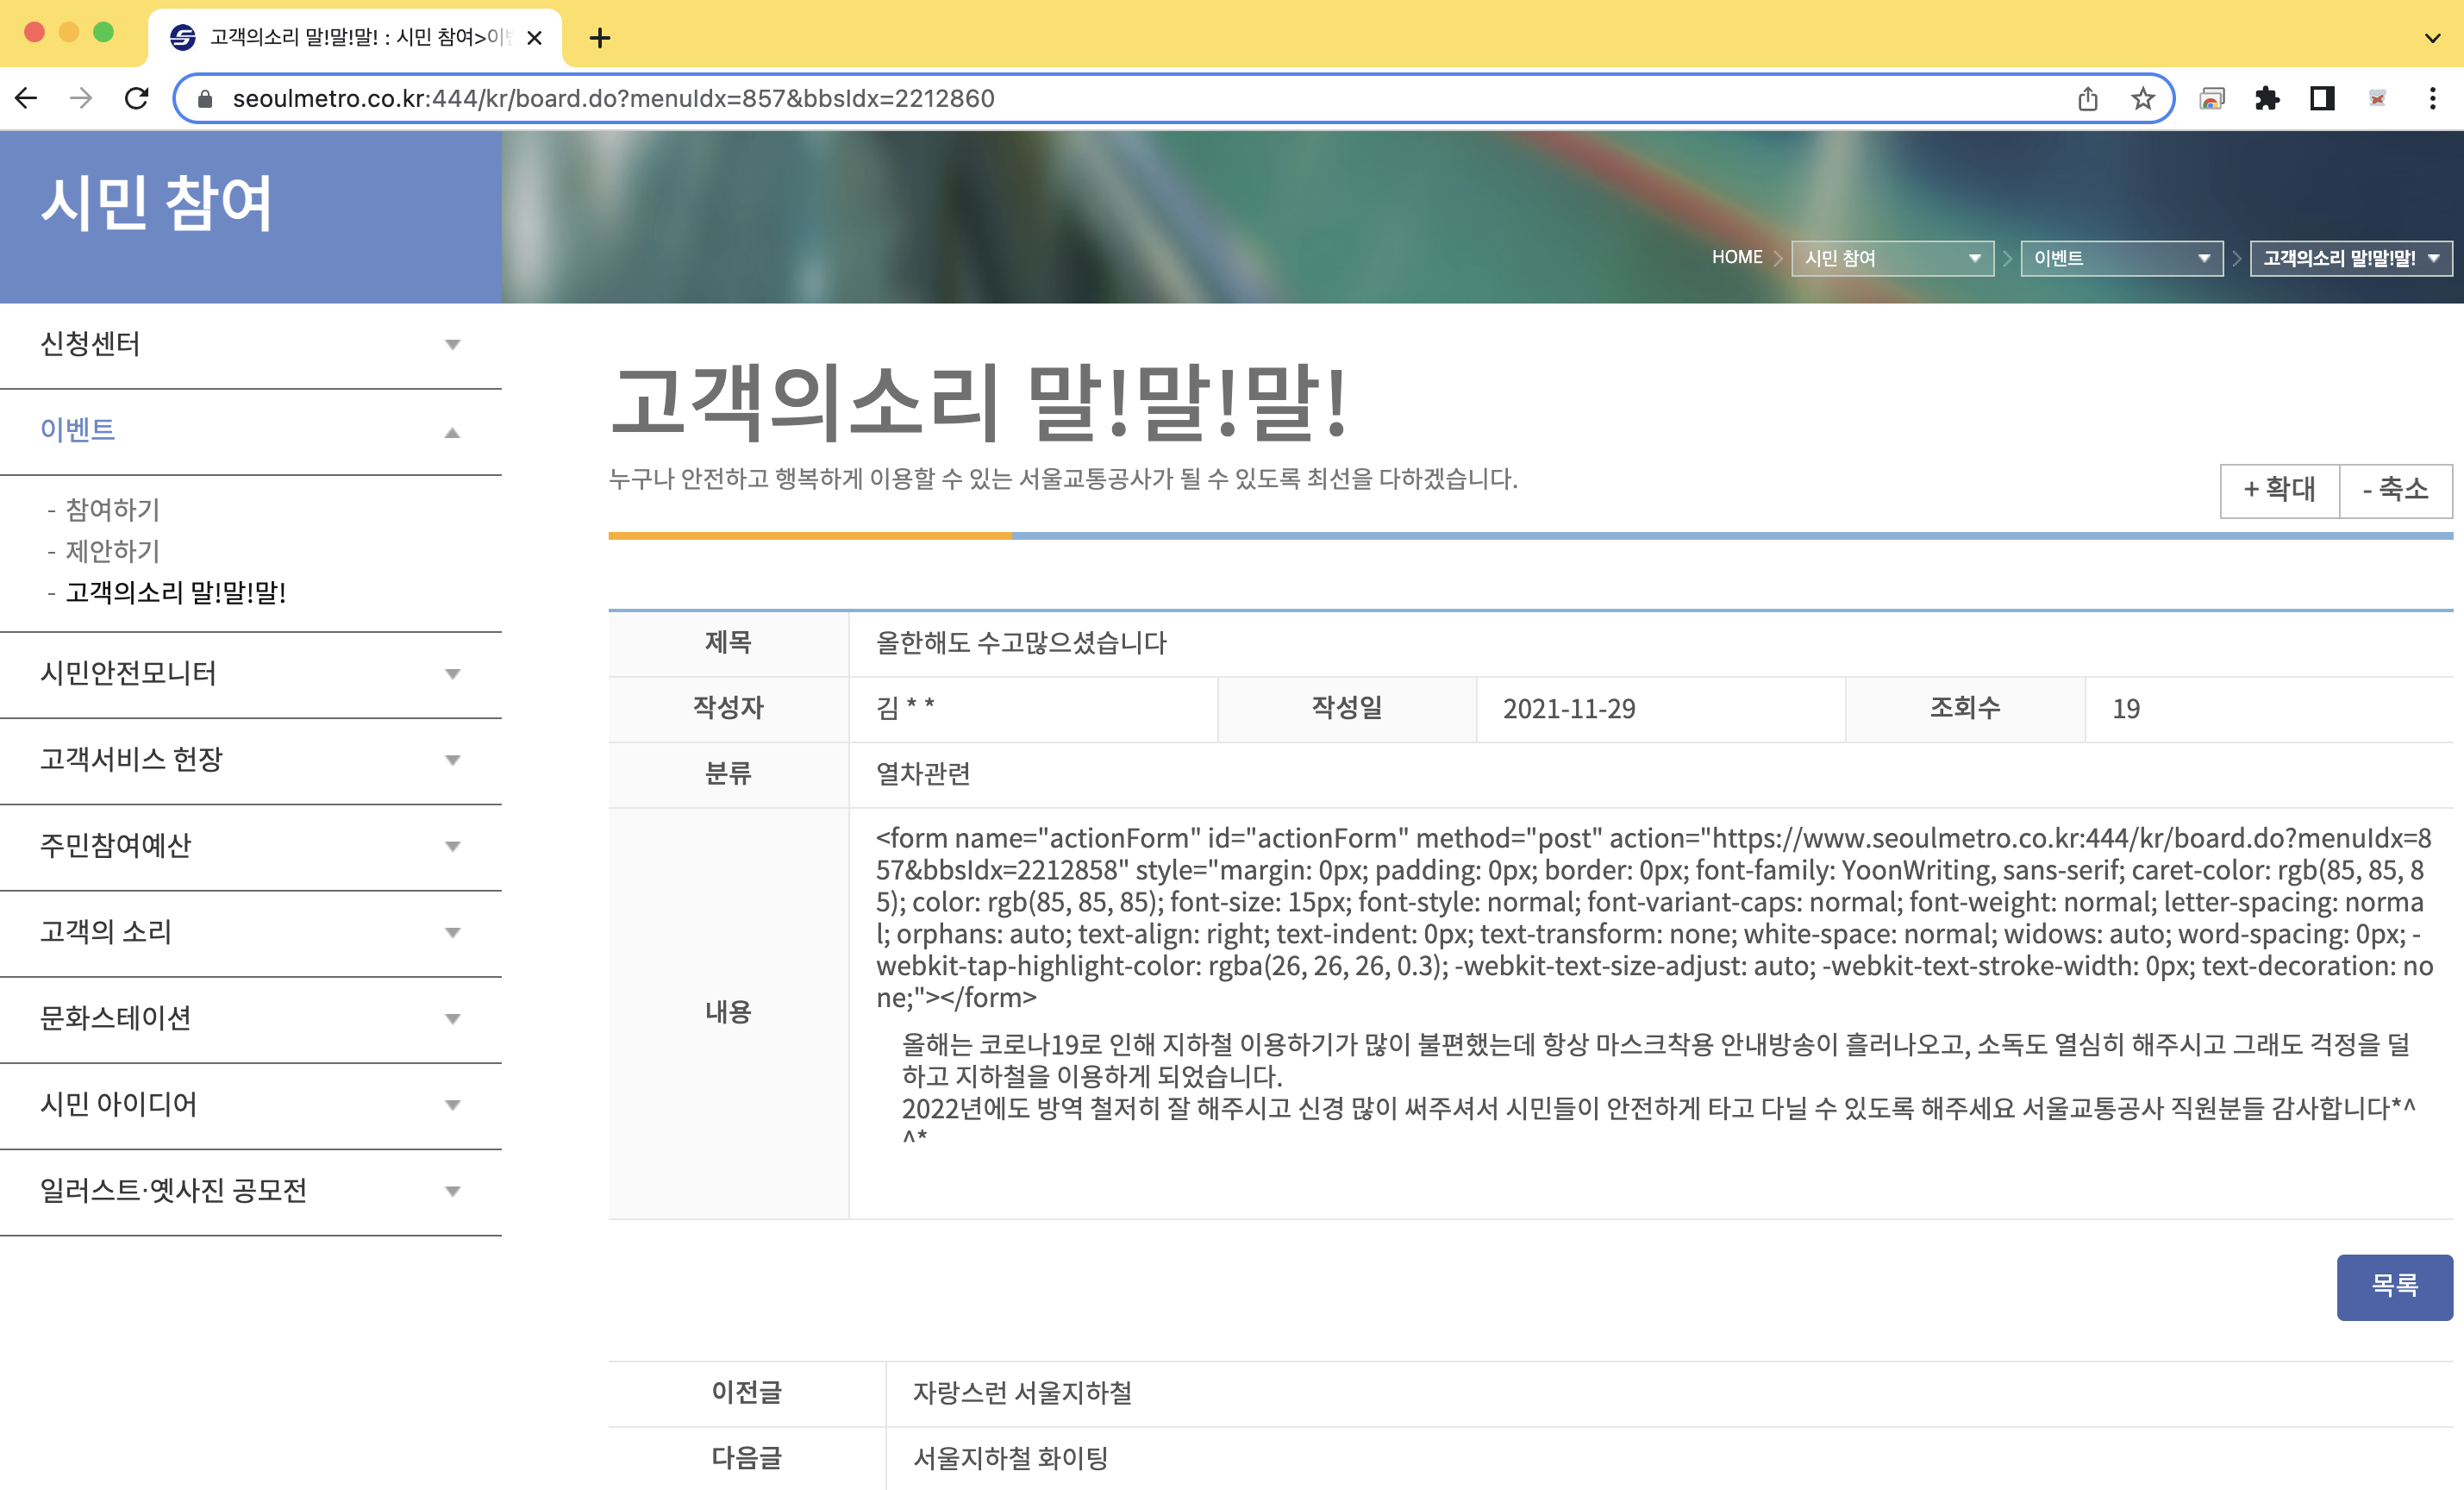 <br>
이런 데이터가 한개뿐이어서 **하드코딩으로 수정**해주었다.

In [14]:
df['content'][:10]

0    2022년에는 1~8호선 모든 열차가 정시 출도착할 수 있게해 주세요! 서울교통공사...
1    제목 그대로 입니다!2022년에는 항상 안전운행을 유지될 수 있도록 진심으로 바랍니...
2                     2022년에도 안전운행 부탁드립니다올한해도 고생많으셨습니다
3              새해는 지하철 이용하는 사람들 모두 행복한 일만 가득했으면 좋겠어요홧팅
4                 2022년에는 안전한 운행으로 행복한 2022년을 만들어 갑시다!
5    2022년에는 승객들이 더욱 안전하고 질서있게 이용하는 지하철이 됐으면 좋겠어요잡상...
6    올해는 코로나19로 인해 지하철 이용하기가 불편하고 걱정스러운면이 있었습니다.그러나...
7                              세계최고 서울지하철~ 너무 자랑스럽습니다~
8    <form name="actionForm" id="actionForm" method...
9                                            수고가 많으십니다
Name: content, dtype: object

In [15]:
df['content'][8]

'<form name="actionForm" id="actionForm" method="post" action="https://www.seoulmetro.co.kr:444/kr/board.do?menuIdx=857&bbsIdx=2212858" style="margin: 0px; padding: 0px; border: 0px; font-family: YoonWriting, sans-serif; caret-color: rgb(85, 85, 85); color: rgb(85, 85, 85); font-size: 15px; font-style: normal; font-variant-caps: normal; font-weight: normal; letter-spacing: normal; orphans: auto; text-align: right; text-indent: 0px; text-transform: none; white-space: normal; widows: auto; word-spacing: 0px; -webkit-tap-highlight-color: rgba(26, 26, 26, 0.3); -webkit-text-size-adjust: auto; -webkit-text-stroke-width: 0px; text-decoration: none;"></form>올해는 코로나19로 인해 지하철 이용하기가 많이 불편했는데항상 마스크착용 안내방송이 흘러나오고, 소독도 열심히해주시고 그래도 걱정을 덜하고지하철을 이용하게 되었습니다.2022년에도 방역 철저히 잘 해주시고 신경 많이 써주셔서 시민들이 안전하게 타고 다닐 수 있도록 해주세요서울교통공사 직원분들감사합니다*^^*'

In [16]:
df['content'][8] = "올해는 코로나19로 인해 지하철 이용하기가 많이 불편했는데항상 마스크착용 안내방송이 흘러나오고, 소독도 열심히해주시고 그래도 걱정을 덜하고지하철을 이용하게 되었습니다.2022년에도 방역 철저히 잘 해주시고 신경 많이 써주셔서 시민들이 안전하게 타고 다닐 수 있도록 해주세요서울교통공사 직원분들감사합니다"

/var/folders/j7/1z0h6p4d553cqf5_7bw8dym00000gn/T/ipykernel_1026/3503290961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'][8] = "올해는 코로나19로 인해 지하철 이용하기가 많이 불편했는데항상 마스크착용 안내방송이 흘러나오고, 소독도 열심히해주시고 그래도 걱정을 덜하고지하철을 이용하게 되었습니다.2022년에도 방역 철저히 잘 해주시고 신경 많이 써주셔서 시민들이 안전하게 타고 다닐 수 있도록 해주세요서울교통공사 직원분들감사합니다"


In [18]:
df['content'][8]

'올해는 코로나19로 인해 지하철 이용하기가 많이 불편했는데항상 마스크착용 안내방송이 흘러나오고, 소독도 열심히해주시고 그래도 걱정을 덜하고지하철을 이용하게 되었습니다.2022년에도 방역 철저히 잘 해주시고 신경 많이 써주셔서 시민들이 안전하게 타고 다닐 수 있도록 해주세요서울교통공사 직원분들감사합니다'

In [19]:
# 리스트로 변환
contents = df['content'].tolist() 
len(contents)

392

In [24]:
for i in range(len(contents)):
    contents[i] = str(contents[i])

In [25]:
contents = ' '.join(contents)
contents[:1000]

'2022년에는 1~8호선 모든 열차가 정시 출도착할 수 있게해 주세요! 서울교통공사 홧팅~ 제목 그대로 입니다!2022년에는 항상 안전운행을 유지될 수 있도록 진심으로 바랍니다. 또한 관계자분들과 승객분들이 서로 불편한점 없이 열차 사고 및 지연이 제로가 될 수 있기를 진심으로 바랍니다.감사합니다.다가오는 2021년 연말.미리 인사 드립니다. 한 해동안 수고 많았습니다. 2022년에도 안전운행 부탁드립니다올한해도 고생많으셨습니다 새해는 지하철 이용하는 사람들 모두 행복한 일만 가득했으면 좋겠어요홧팅 2022년에는 안전한 운행으로 행복한 2022년을 만들어 갑시다! 2022년에는 승객들이 더욱 안전하고 질서있게 이용하는 지하철이 됐으면 좋겠어요잡상인, 임산부, 노약자석에 대한 관리가 더욱 강화되었으면 합니다 !2022년도 화이팅 !! 올해는 코로나19로 인해 지하철 이용하기가 불편하고 걱정스러운면이 있었습니다.그러나 걱정은 잠시뿐 항상 마스크착용 안내방송이 흘러나오고, 소독도 열심히 해주시는 모습을 보며안심하고 지하철을 이용하게 되었습니다.2022년에도 깨끗하고 안전한열차 타게해주세요~서울교통공사 직원 여러분들 시민을 위해 노력해주셔서 감사합니다*^^* 세계최고 서울지하철~ 너무 자랑스럽습니다~ 올해는 코로나19로 인해 지하철 이용하기가 많이 불편했는데항상 마스크착용 안내방송이 흘러나오고, 소독도 열심히해주시고 그래도 걱정을 덜하고지하철을 이용하게 되었습니다.2022년에도 방역 철저히 잘 해주시고 신경 많이 써주셔서 시민들이 안전하게 타고 다닐 수 있도록 해주세요서울교통공사 직원분들감사합니다 수고가 많으십니다 초고령화시대를 앞두고 있는 현실 속에서공사의 재정건정성을 저해하는노인 무임승차로 인한 손실을 반드시 국가에서 보전받고더 탄탄한 서울교통공사로 거듭나기를 기원합니다! 역을 이용하면서 항상 느끼는데 직원분들이 친절하시고 열심히 일하시는 것 같았어요!2022년에도 새해 복 많이 받으시고, 빠르고 안전한 지하철 만들어주세요! 항상 안전하게 운전해주셔서 감사드리며

In [26]:
# 단어 정규화 및 어근화, 품사 태깅
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(contents, norm=True, stem=True)
raw_pos_tagged

[0.022s][warning][os,thread] Attempt to protect stack guard pages failed (0x000000016b4b0000-0x000000016b4bc000).
[0.022s][warning][os,thread] Attempt to deallocate stack guard pages failed.


[('2022년', 'Number'),
 ('에는', 'Foreign'),
 ('1~8', 'Number'),
 ('호선', 'Noun'),
 ('모든', 'Noun'),
 ('열차', 'Noun'),
 ('가', 'Josa'),
 ('정시', 'Noun'),
 ('추다', 'Verb'),
 ('착하다', 'Adjective'),
 ('수', 'Noun'),
 ('있다', 'Adjective'),
 ('줄다', 'Verb'),
 ('!', 'Punctuation'),
 ('서울', 'Noun'),
 ('교통', 'Noun'),
 ('공사', 'Noun'),
 ('홧팅', 'Noun'),
 ('~', 'Punctuation'),
 ('제목', 'Noun'),
 ('그대로', 'Noun'),
 ('이다', 'Adjective'),
 ('!', 'Punctuation'),
 ('2022년', 'Number'),
 ('에는', 'Foreign'),
 ('항상', 'Noun'),
 ('안전', 'Noun'),
 ('운행', 'Noun'),
 ('을', 'Josa'),
 ('유지', 'Noun'),
 ('되다', 'Verb'),
 ('수', 'Noun'),
 ('있다', 'Adjective'),
 ('진심', 'Noun'),
 ('으로', 'Josa'),
 ('바라다', 'Verb'),
 ('.', 'Punctuation'),
 ('또한', 'Noun'),
 ('관계자', 'Noun'),
 ('분들', 'Suffix'),
 ('과', 'Josa'),
 ('승객', 'Noun'),
 ('분들', 'Suffix'),
 ('이', 'Josa'),
 ('서로', 'Noun'),
 ('불편하다', 'Adjective'),
 ('점', 'Noun'),
 ('없이', 'Adverb'),
 ('열차', 'Noun'),
 ('사고', 'Noun'),
 ('및', 'Noun'),
 ('지연', 'Noun'),
 ('이', 'Josa'),
 ('제로', 'Noun'),
 ('가', 'Jos

### 이모티콘 제거

In [69]:
# 실패1 - 한글까지 다 날라감
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [71]:
test = remove_emoji("아니이게👍❗️😁")
print(test)

In [73]:
# 실패2 - ❗️ 이건 안 사라짐
text = "아니이게👍❗️😊"
print(text) 
only_BMP_pattern = re.compile("["
        u"\U00010000-\U0010FFFF"  #BMP characters 이외
                           "]+", flags=re.UNICODE)
print(only_BMP_pattern.sub(r'', text))# BMP characters만

아니이게👍❗️😊
아니이게❗️


In [82]:
# 보완1 - replace를 선택
text = "아니이게👍❗️😊"
text = text.replace("❗️","")
print(text)

아니이게👍😊


In [27]:
# 완성
def remove_emoji(string):
    string = string.replace("❗","").replace("❤","").replace("♡","")
    emoji_pattern = re.compile("["
        u"\U00010000-\U0010FFFF"  #BMP characters 이외
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [28]:
contents = remove_emoji(contents)
print(contents)

2022년에는 1~8호선 모든 열차가 정시 출도착할 수 있게해 주세요! 서울교통공사 홧팅~ 제목 그대로 입니다!2022년에는 항상 안전운행을 유지될 수 있도록 진심으로 바랍니다. 또한 관계자분들과 승객분들이 서로 불편한점 없이 열차 사고 및 지연이 제로가 될 수 있기를 진심으로 바랍니다.감사합니다.다가오는 2021년 연말.미리 인사 드립니다. 한 해동안 수고 많았습니다. 2022년에도 안전운행 부탁드립니다올한해도 고생많으셨습니다 새해는 지하철 이용하는 사람들 모두 행복한 일만 가득했으면 좋겠어요홧팅 2022년에는 안전한 운행으로 행복한 2022년을 만들어 갑시다! 2022년에는 승객들이 더욱 안전하고 질서있게 이용하는 지하철이 됐으면 좋겠어요잡상인, 임산부, 노약자석에 대한 관리가 더욱 강화되었으면 합니다 !2022년도 화이팅 !! 올해는 코로나19로 인해 지하철 이용하기가 불편하고 걱정스러운면이 있었습니다.그러나 걱정은 잠시뿐 항상 마스크착용 안내방송이 흘러나오고, 소독도 열심히 해주시는 모습을 보며안심하고 지하철을 이용하게 되었습니다.2022년에도 깨끗하고 안전한열차 타게해주세요~서울교통공사 직원 여러분들 시민을 위해 노력해주셔서 감사합니다*^^* 세계최고 서울지하철~ 너무 자랑스럽습니다~ 올해는 코로나19로 인해 지하철 이용하기가 많이 불편했는데항상 마스크착용 안내방송이 흘러나오고, 소독도 열심히해주시고 그래도 걱정을 덜하고지하철을 이용하게 되었습니다.2022년에도 방역 철저히 잘 해주시고 신경 많이 써주셔서 시민들이 안전하게 타고 다닐 수 있도록 해주세요서울교통공사 직원분들감사합니다 수고가 많으십니다 초고령화시대를 앞두고 있는 현실 속에서공사의 재정건정성을 저해하는노인 무임승차로 인한 손실을 반드시 국가에서 보전받고더 탄탄한 서울교통공사로 거듭나기를 기원합니다! 역을 이용하면서 항상 느끼는데 직원분들이 친절하시고 열심히 일하시는 것 같았어요!2022년에도 새해 복 많이 받으시고, 빠르고 안전한 지하철 만들어주세요! 항상 안전하게 운전해주셔서 감사드리며,

## 단어 정규화 및 어근화, 품사 태깅

In [29]:
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(contents, norm=True, stem=True)
raw_pos_tagged

[('2022년', 'Number'),
 ('에는', 'Foreign'),
 ('1~8', 'Number'),
 ('호선', 'Noun'),
 ('모든', 'Noun'),
 ('열차', 'Noun'),
 ('가', 'Josa'),
 ('정시', 'Noun'),
 ('추다', 'Verb'),
 ('착하다', 'Adjective'),
 ('수', 'Noun'),
 ('있다', 'Adjective'),
 ('줄다', 'Verb'),
 ('!', 'Punctuation'),
 ('서울', 'Noun'),
 ('교통', 'Noun'),
 ('공사', 'Noun'),
 ('홧팅', 'Noun'),
 ('~', 'Punctuation'),
 ('제목', 'Noun'),
 ('그대로', 'Noun'),
 ('이다', 'Adjective'),
 ('!', 'Punctuation'),
 ('2022년', 'Number'),
 ('에는', 'Foreign'),
 ('항상', 'Noun'),
 ('안전', 'Noun'),
 ('운행', 'Noun'),
 ('을', 'Josa'),
 ('유지', 'Noun'),
 ('되다', 'Verb'),
 ('수', 'Noun'),
 ('있다', 'Adjective'),
 ('진심', 'Noun'),
 ('으로', 'Josa'),
 ('바라다', 'Verb'),
 ('.', 'Punctuation'),
 ('또한', 'Noun'),
 ('관계자', 'Noun'),
 ('분들', 'Suffix'),
 ('과', 'Josa'),
 ('승객', 'Noun'),
 ('분들', 'Suffix'),
 ('이', 'Josa'),
 ('서로', 'Noun'),
 ('불편하다', 'Adjective'),
 ('점', 'Noun'),
 ('없이', 'Adverb'),
 ('열차', 'Noun'),
 ('사고', 'Noun'),
 ('및', 'Noun'),
 ('지연', 'Noun'),
 ('이', 'Josa'),
 ('제로', 'Noun'),
 ('가', 'Jos

## 단어 등장 빈도 카운팅

In [97]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', 
            '이렇다','어떻다','되어다','해주다','인하다','같다','많이','보다','너무','위해','분들','정말','조금'] 

word_cleaned = []

for word in raw_pos_tagged: 
    
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: 

        if (len(word[0]) != 1) & (word[0] not in del_list):
            
            word_cleaned.append(word[0])
        
word_cleaned

['2022년',
 '1~8',
 '호선',
 '모든',
 '열차',
 '정시',
 '추다',
 '착하다',
 '줄다',
 '서울',
 '교통',
 '공사',
 '홧팅',
 '제목',
 '그대로',
 '2022년',
 '항상',
 '안전',
 '운행',
 '유지',
 '진심',
 '바라다',
 '또한',
 '관계자',
 '승객',
 '서로',
 '불편하다',
 '없이',
 '열차',
 '사고',
 '지연',
 '제로',
 '진심',
 '바라다',
 '감사하다',
 '다가오다',
 '2021년',
 '연말',
 '미리',
 '인사',
 '드리다',
 '해동',
 '수고',
 '많다',
 '2022년',
 '안전',
 '운행',
 '부탁드리다',
 '한해',
 '고생',
 '많다',
 '새해',
 '지하철',
 '이용',
 '사람',
 '모두',
 '행복하다',
 '일만',
 '가득하다',
 '좋다',
 '홧팅',
 '2022년',
 '안전하다',
 '운행',
 '행복하다',
 '2022년',
 '만들다',
 '가다',
 '2022년',
 '승객',
 '더욱',
 '안전하다',
 '질서',
 '이용',
 '지하철',
 '좋다',
 '잡상인',
 '임산부',
 '노약',
 '자석',
 '대한',
 '관리',
 '더욱',
 '강화',
 '2022년',
 '화이팅',
 '올해',
 '코로나',
 '19',
 '지하철',
 '이용',
 '불편하다',
 '걱정스럽다',
 '그러나',
 '걱정',
 '잠시',
 '항상',
 '마스크',
 '착용',
 '안내',
 '방송',
 '흘러나오다',
 '소독',
 '열심히',
 '해주시',
 '모습',
 '안심',
 '지하철',
 '이용',
 '2022년',
 '깨끗하다',
 '안전하다',
 '열차',
 '타다',
 '서울',
 '교통',
 '공사',
 '직원',
 '여러분',
 '시민',
 '노력',
 '감사하다',
 '세계',
 '최고',
 '서울',
 '지하철',
 '자랑스럽다',
 '올해',
 '코로나',
 '19',
 '지하

In [98]:
# 리스트에 담긴 단어들을 대상으로 갯수를 세어,
# 단어를 key로 등장 횟수를 value로 하는 dict를 만듭니다.

word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 
    else:
        word_dic[word] += 1
        
word_dic

{'2022년': 43,
 '1~8': 2,
 '호선': 69,
 '모든': 15,
 '열차': 150,
 '정시': 6,
 '추다': 13,
 '착하다': 1,
 '줄다': 14,
 '서울': 70,
 '교통': 91,
 '공사': 81,
 '홧팅': 2,
 '제목': 1,
 '그대로': 5,
 '항상': 62,
 '안전': 55,
 '운행': 49,
 '유지': 13,
 '진심': 11,
 '바라다': 36,
 '또한': 11,
 '관계자': 7,
 '승객': 26,
 '서로': 6,
 '불편하다': 33,
 '없이': 14,
 '사고': 16,
 '지연': 11,
 '제로': 1,
 '감사하다': 86,
 '다가오다': 6,
 '2021년': 10,
 '연말': 2,
 '미리': 10,
 '인사': 1,
 '드리다': 48,
 '해동': 1,
 '수고': 23,
 '많다': 127,
 '부탁드리다': 53,
 '한해': 14,
 '고생': 18,
 '새해': 7,
 '지하철': 150,
 '이용': 179,
 '사람': 103,
 '모두': 19,
 '행복하다': 6,
 '일만': 3,
 '가득하다': 6,
 '좋다': 140,
 '안전하다': 58,
 '만들다': 19,
 '가다': 28,
 '더욱': 11,
 '질서': 2,
 '잡상인': 3,
 '임산부': 55,
 '노약': 5,
 '자석': 3,
 '대한': 21,
 '관리': 17,
 '강화': 12,
 '화이팅': 14,
 '올해': 4,
 '코로나': 64,
 '19': 13,
 '걱정스럽다': 1,
 '그러나': 2,
 '걱정': 14,
 '잠시': 4,
 '마스크': 65,
 '착용': 26,
 '안내': 61,
 '방송': 58,
 '흘러나오다': 2,
 '소독': 6,
 '열심히': 6,
 '해주시': 14,
 '모습': 18,
 '안심': 3,
 '깨끗하다': 10,
 '타다': 39,
 '직원': 25,
 '여러분': 12,
 '시민': 66,
 '노력': 17,
 '세계': 4,

## 워드클라우드 만들기

In [99]:
word_dic.items()

dict_items([('2022년', 43), ('1~8', 2), ('호선', 69), ('모든', 15), ('열차', 150), ('정시', 6), ('추다', 13), ('착하다', 1), ('줄다', 14), ('서울', 70), ('교통', 91), ('공사', 81), ('홧팅', 2), ('제목', 1), ('그대로', 5), ('항상', 62), ('안전', 55), ('운행', 49), ('유지', 13), ('진심', 11), ('바라다', 36), ('또한', 11), ('관계자', 7), ('승객', 26), ('서로', 6), ('불편하다', 33), ('없이', 14), ('사고', 16), ('지연', 11), ('제로', 1), ('감사하다', 86), ('다가오다', 6), ('2021년', 10), ('연말', 2), ('미리', 10), ('인사', 1), ('드리다', 48), ('해동', 1), ('수고', 23), ('많다', 127), ('부탁드리다', 53), ('한해', 14), ('고생', 18), ('새해', 7), ('지하철', 150), ('이용', 179), ('사람', 103), ('모두', 19), ('행복하다', 6), ('일만', 3), ('가득하다', 6), ('좋다', 140), ('안전하다', 58), ('만들다', 19), ('가다', 28), ('더욱', 11), ('질서', 2), ('잡상인', 3), ('임산부', 55), ('노약', 5), ('자석', 3), ('대한', 21), ('관리', 17), ('강화', 12), ('화이팅', 14), ('올해', 4), ('코로나', 64), ('19', 13), ('걱정스럽다', 1), ('그러나', 2), ('걱정', 14), ('잠시', 4), ('마스크', 65), ('착용', 26), ('안내', 61), ('방송', 58), ('흘러나오다', 2), ('소독', 6), ('열심히', 6), ('해주시', 14), ('모습', 

In [100]:
list(word_dic.items())

[('2022년', 43),
 ('1~8', 2),
 ('호선', 69),
 ('모든', 15),
 ('열차', 150),
 ('정시', 6),
 ('추다', 13),
 ('착하다', 1),
 ('줄다', 14),
 ('서울', 70),
 ('교통', 91),
 ('공사', 81),
 ('홧팅', 2),
 ('제목', 1),
 ('그대로', 5),
 ('항상', 62),
 ('안전', 55),
 ('운행', 49),
 ('유지', 13),
 ('진심', 11),
 ('바라다', 36),
 ('또한', 11),
 ('관계자', 7),
 ('승객', 26),
 ('서로', 6),
 ('불편하다', 33),
 ('없이', 14),
 ('사고', 16),
 ('지연', 11),
 ('제로', 1),
 ('감사하다', 86),
 ('다가오다', 6),
 ('2021년', 10),
 ('연말', 2),
 ('미리', 10),
 ('인사', 1),
 ('드리다', 48),
 ('해동', 1),
 ('수고', 23),
 ('많다', 127),
 ('부탁드리다', 53),
 ('한해', 14),
 ('고생', 18),
 ('새해', 7),
 ('지하철', 150),
 ('이용', 179),
 ('사람', 103),
 ('모두', 19),
 ('행복하다', 6),
 ('일만', 3),
 ('가득하다', 6),
 ('좋다', 140),
 ('안전하다', 58),
 ('만들다', 19),
 ('가다', 28),
 ('더욱', 11),
 ('질서', 2),
 ('잡상인', 3),
 ('임산부', 55),
 ('노약', 5),
 ('자석', 3),
 ('대한', 21),
 ('관리', 17),
 ('강화', 12),
 ('화이팅', 14),
 ('올해', 4),
 ('코로나', 64),
 ('19', 13),
 ('걱정스럽다', 1),
 ('그러나', 2),
 ('걱정', 14),
 ('잠시', 4),
 ('마스크', 65),
 ('착용', 26),
 ('안내', 61),
 ('방송'

In [101]:
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('이용', 179),
 ('열차', 150),
 ('지하철', 150),
 ('좋다', 140),
 ('많다', 127),
 ('사람', 103),
 ('교통', 91),
 ('감사하다', 86),
 ('공사', 81),
 ('시간', 75),
 ('서울', 70),
 ('호선', 69),
 ('시민', 66),
 ('마스크', 65),
 ('코로나', 64),
 ('없다', 63),
 ('항상', 62),
 ('안내', 61),
 ('안전하다', 58),
 ('방송', 58),
 ('안전', 55),
 ('임산부', 55),
 ('부탁드리다', 53),
 ('배차', 51),
 ('운행', 49),
 ('드리다', 48),
 ('자다', 48),
 ('경우', 44),
 ('2022년', 43),
 ('방역', 42),
 ('자주', 42),
 ('생각', 41),
 ('타다', 39),
 ('감사', 37),
 ('바라다', 36),
 ('불편하다', 33),
 ('응원', 32),
 ('간격', 32),
 ('보이다', 30),
 ('안녕하다', 29),
 ('가다', 28),
 ('앉다', 28),
 ('배려', 28),
 ('들다', 28),
 ('필요하다', 28),
 ('신경', 27),
 ('승객', 26),
 ('착용', 26),
 ('직원', 25),
 ('주다', 25),
 ('오다', 24),
 ('수고', 23),
 ('나오다', 23),
 ('쓰다', 23),
 ('출퇴근', 23),
 ('도착', 23),
 ('대한', 21),
 ('고객', 21),
 ('맞추다', 21),
 ('써주다', 20),
 ('기다리다', 20),
 ('모두', 19),
 ('만들다', 19),
 ('그리고', 19),
 ('쾌적하다', 19),
 ('개선', 19),
 ('고생', 18),
 ('모습', 18),
 ('받다', 18),
 ('매일', 18),
 ('늘리다', 18),
 ('시설', 18),
 ('요즘', 18),
 ('문제', 18)

In [102]:
# 내림차순 정렬된 단어 중 상위 50개
for word, count in sorted_word_dic[:50]:
    print("{0}({1})".format(word, count), end=" ")

이용(179) 열차(150) 지하철(150) 좋다(140) 많다(127) 사람(103) 교통(91) 감사하다(86) 공사(81) 시간(75) 서울(70) 호선(69) 시민(66) 마스크(65) 코로나(64) 없다(63) 항상(62) 안내(61) 안전하다(58) 방송(58) 안전(55) 임산부(55) 부탁드리다(53) 배차(51) 운행(49) 드리다(48) 자다(48) 경우(44) 2022년(43) 방역(42) 자주(42) 생각(41) 타다(39) 감사(37) 바라다(36) 불편하다(33) 응원(32) 간격(32) 보이다(30) 안녕하다(29) 가다(28) 앉다(28) 배려(28) 들다(28) 필요하다(28) 신경(27) 승객(26) 착용(26) 직원(25) 주다(25) 

### 단어 등장 빈도 시각화

In [103]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

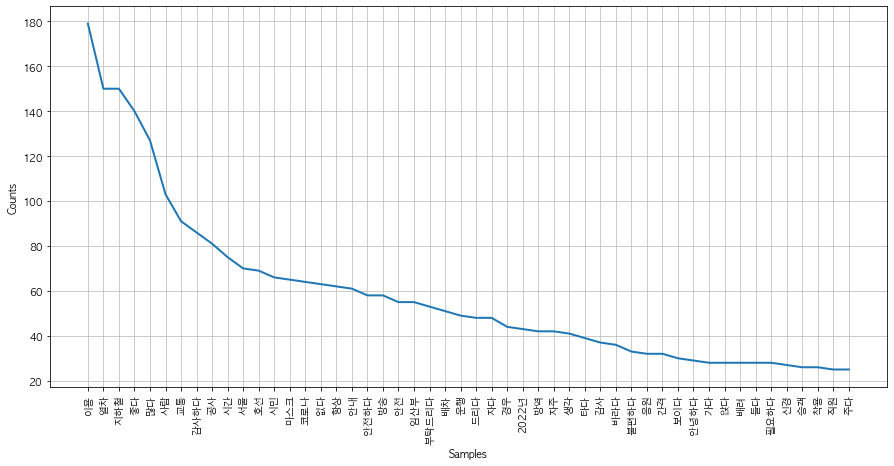

In [104]:
word_counted = nltk.Text(word_cleaned) 

plt.figure(figsize=(15, 7))

word_counted.plot(50) 

In [105]:
word_frequency = nltk.FreqDist(word_cleaned) 
word_frequency

FreqDist({'이용': 179, '열차': 150, '지하철': 150, '좋다': 140, '많다': 127, '사람': 103, '교통': 91, '감사하다': 86, '공사': 81, '시간': 75, ...})

In [106]:
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

result = df.sort_values([0], ascending=False)
result = result[:50]
result

,0
이용,179
열차,150
지하철,150
좋다,140
많다,127
사람,103
교통,91
감사하다,86
공사,81
시간,75


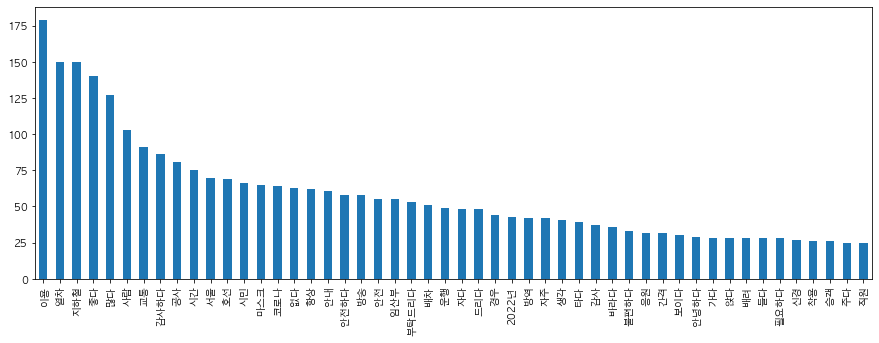

In [107]:
result.plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

## 워드클라우드

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
word_cloud = WordCloud(font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf",
                       max_words=50,width=2000, height=1000,
                       background_color='white').generate_from_frequencies(word_dic)

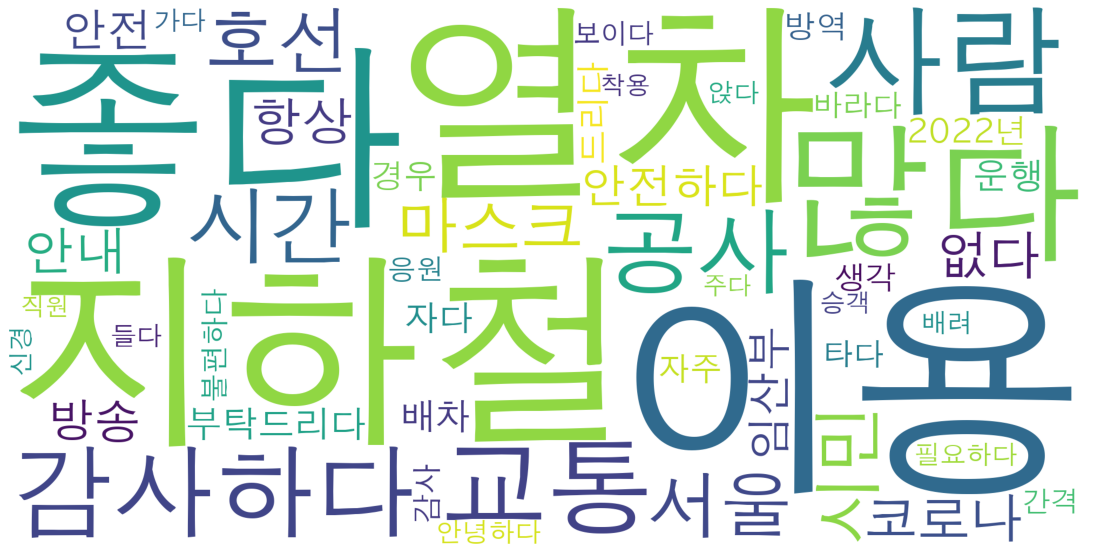

In [113]:
plt.figure(figsize=(15,15)) 

plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad=0)

plt.show()

In [115]:
from PIL import Image

icon = Image.open('data/metro-icon.png')

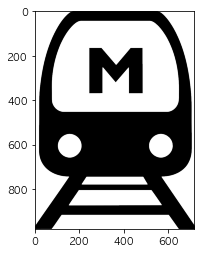

In [116]:
plt.imshow(np.array(icon))

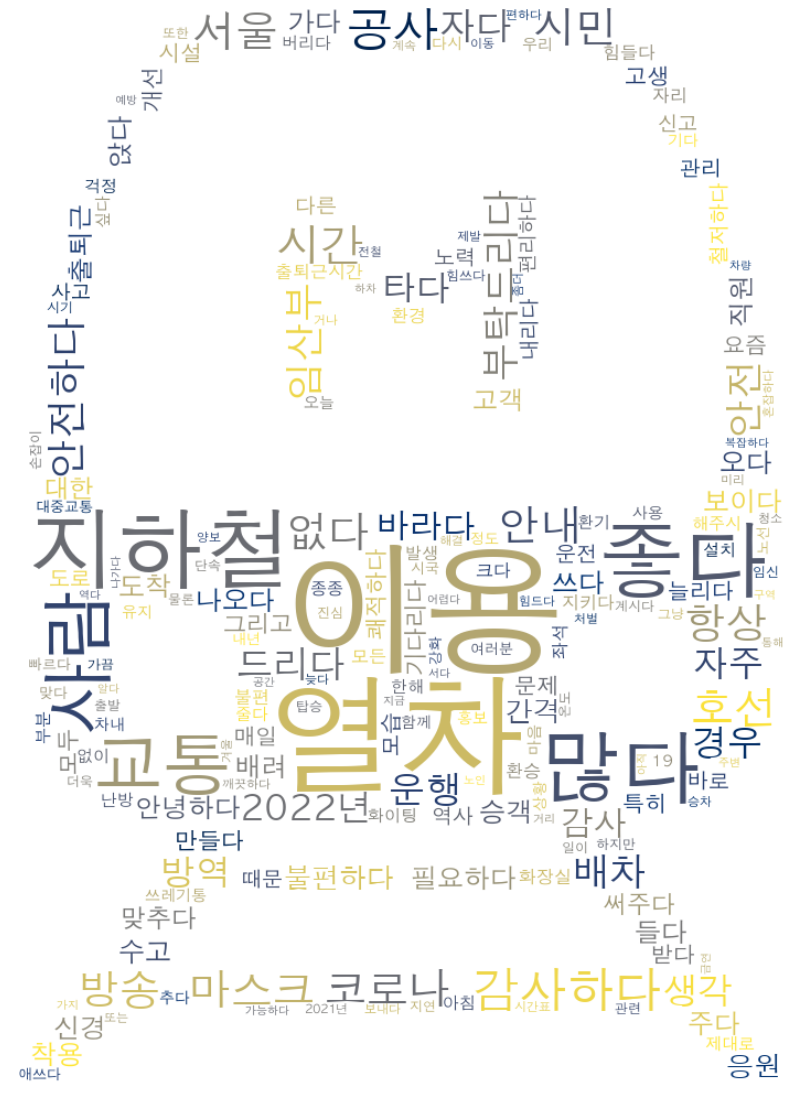

In [128]:
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.

python_coloring = np.array(icon)
image_colors = ImageColorGenerator(python_coloring)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                       width=2000, height=1000,  
                       mask=python_coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))

plt.imshow(word_cloud.recolor(colormap='cividis'), interpolation='bilinear') 

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [129]:
word_cloud.to_file("data/word_cloud_completed_metro.png")